In [6]:
# data import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display   

%matplotlib inline
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

adult = pd.read_csv(
    URL,
    
    # specify the file encoding
    encoding="utf-8",
    
    # specify the separator in the data
    sep=",",      # comma separated values
    
    # ignore spaces after the separator
    skipinitialspace=True,
    index_col=None,
    
    # use manual headers
    header=None,
    names=[
        "age", "workclass", "fnlwgt", "education", 
        "education-num", "marital-status", "occupation",
        "relationship", "race", "sex", "capital-gain", 
        "capital-loss", "hours-per-week", "native-country",
        "wage"
    ]
)

# categorical -> one hot encoding
# convert each categorical feature using one-hot encoding

obj_df = adult.select_dtypes(include=["object"]).drop("wage", axis=1)
int_df = adult.select_dtypes(include=["int64"])

onehot_obj = pd.get_dummies(obj_df, drop_first=True)# dummy trap(one variable can be induced)
design_adult = pd.concat([onehot_obj,int_df], axis=1)

display(design_adult)

# 속성(변수) 선택
X=design_adult
y=adult['wage']

# # 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,27,257302,12,0,0,38
32557,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,40,154374,9,0,0,40
32558,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,58,151910,9,0,0,40
32559,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,22,201490,9,0,0,20


In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=2000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
model_rf.fit(X_train, y_train)
y_hat = model_rf.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

print("%.4f" % model_rf.oob_score_)
print("%.5f" %model_rf.oob_score_)

['<=50K' '<=50K' '>50K' '>50K' '>50K' '<=50K' '>50K' '>50K' '<=50K'
 '<=50K']
['<=50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K' '<=50K'
 '<=50K']
0.8639
0.86394


In [3]:
# model 성능확인
from sklearn import metrics as mt

y_hat_t=model_rf.predict(X_train)

t_acc = mt.accuracy_score(y_train, y_hat_t)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("train accuracy", t_acc)
print("accuracy", acc )
print("confusion matrix\n",conf)

# 모형 성능 평가 - 평가지표 계산
report_rf = mt.classification_report(y_test, y_hat)            
print(report_rf)

train accuracy 0.9398911898911899
accuracy 0.8604770191421844
confusion matrix
 [[6956  467]
 [ 896 1450]]
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7423
        >50K       0.76      0.62      0.68      2346

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.86      9769



                             variable  importance
94                                age    0.127026
97                       capital-gain    0.116630
24  marital-status_Married-civ-spouse    0.108733
95                             fnlwgt    0.090412
99                     hours-per-week    0.072833
96                      education-num    0.072134
26       marital-status_Never-married    0.048609
98                       capital-loss    0.035160
43         relationship_Not-in-family    0.023844
45             relationship_Own-child    0.023760
52                           sex_Male    0.021205
32         occupation_Exec-managerial    0.019170
38          occupation_Prof-specialty    0.015783
16                education_Bachelors    0.012401
46             relationship_Unmarried    0.011957
36           occupation_Other-service    0.011653
47                  relationship_Wife    0.010440
3                   workclass_Private    0.009753
18                  education_HS-grad    0.008993


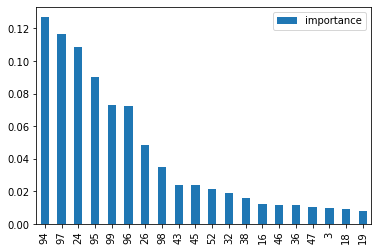

In [10]:
# variable importance

a= pd.concat((pd.DataFrame(design_adult.columns, columns = ['variable']), 
           pd.DataFrame(model_rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

print(pd.concat((pd.DataFrame(design_adult.columns, columns = ['variable']), 
           pd.DataFrame(model_rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]
     )
a.plot(kind='bar')
plt.show()
# model_rf.feature_importances_